In [1]:
import os
import paltas
from astropy.visualization import simple_norm
import visualization_utils
from paltas import generate
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20


plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline
root_path = paltas.__path__[0][:-7]
import re

/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


### paltas PSF library

In [13]:
# psf_im = np.load('data/psf_images.npy', mmap_mode='r+')

In [14]:
# psf_im_i = psf_im[:, 1, :, :]

In [15]:
# # index = np.random.randint(0, psf_im_i.shape[0])
# index = 0
# psf_kernels = psf_im_i[index, :, :]
# psf_kernels[psf_kernels<0] = 0
# plt.imshow(psf_kernels);

In [16]:
# psf_sums = np.sum(psf_im_i,axis=(1,2))

In [17]:
# psf_sums = psf_sums.reshape(-1,1,1)

In [18]:
# normalized = psf_im_i/psf_sums
# normalized

In [19]:
# import tensorflow as tf
# normalized = tf.constant(normalized)
# pad_tns = tf.constant([[0, 0],[0,1],[0,1]])
# # -----------padding: ^first_dim^
# # ------------------------padding: ^second_dim^
# # ---------------------------------------padding: ^third_dim^

# # Generating padded Tensor
# res = tf.pad(normalized, pad_tns, mode ='CONSTANT', constant_values=0)
# print(res.shape)


In [20]:
# np.save('data/norm_resize_psf.npy', res)

In [21]:
# #plt.hist(normalized[0, :, 17], alpha=0.5)

# #plt.hist(normalized[0, :, 16], alpha = 0.5)
# plt.plot(normalized[0, :, 15], alpha=0.5, label=15)
# plt.plot(normalized[0, :, 16], alpha=0.5, label=16)
# plt.plot(normalized[0, :, 17], alpha=0.5, label=17)
# plt.plot(normalized[0, :, 18], alpha=0.5, label=18)
# plt.axvline(32//2)
# plt.legend()

In [22]:
# #plt.hist(normalized[0, :, 17], alpha=0.5)

# #plt.hist(normalized[0, :, 16], alpha = 0.5)
# plt.plot(normalized[0, 15, :], alpha=0.5, label=15)
# plt.plot(normalized[0, 16, :], alpha=0.5, label=16)
# plt.plot(normalized[0, 17, :], alpha=0.5, label=17)
# plt.plot(normalized[0, 18, :], alpha=0.5, label=18)
# plt.axvline(32//2)
# plt.legend()

In [23]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 6))
# # ax[0].imshow(normalized_resized[0, :, :])
# ax.imshow(normalized[0, :, :])
# # ax[0].set_title('resized PSF: 31x31')
# ax.set_title('original PSF: 32x32')

In [24]:
# plt.hist(psf_sums.flatten(), density=True, bins=100);
# plt.title("PSF Sum Distribution")
# plt.xlabel("Sum of pixel in PSF kernel");

### Generate

In [9]:
config_file = 'config_LSST'

In [20]:
40000/200000

0.2

In [21]:
command = f'python3 ../paltas/generate.py {config_file}.py generated_images/valid2/{config_file} --n 40000 --tf_record'

In [22]:
os.system(command = command)


/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


Save folder path: generated_images/valid2/config_LSST


/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Sampling/sampler.py:112: UserWarning: Parameter center_x in cross dict specified elsewhere! Will be overwritten. This warning only flags once, but other parameters may also be overwritten.
  warnings.warn('Parameter %s in cross dict specified '%(param)
  0%|          | 0/40000 [00:00<?, ?it/s]/Users/padmavenkatraman/Documents/StrongLensing/lenstronomy/lenstronomy/Data/psf.py:80: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Configs/config_handler.py:366: RuntimeWarning: Parameter (psf_parameters, kernel_point_source) in config_dict, and possibly others, will not be written to metadata.csv
  warnings.warn(
  0%|          | 1/40000 [00:00<4:29:47,  2.47it/s]/Users/padmavenkatraman/Documents/StrongLensing/lenstronomy/lenstronomy/Data/psf.py:80: UserWarning: Input PSF 

Dataset generation complete. Acceptance rate: 1.000
Saving 40000 files into the tf record


100%|██████████| 40000/40000 [00:20<00:00, 1993.58it/s]


0

In [23]:
config_file_path = f'generated_images/train/{config_file}/'

file_list = [os.path.join(config_file_path, i) for i in os.listdir(config_file_path)]
names = np.arange(100).astype(str)


In [24]:
start_index = np.random.randint(0, 100 - 24)
picked_files = file_list[start_index:start_index + 24]
picked_names = names[start_index:start_index + 24]
picked_names

array(['54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75',
       '76', '77'], dtype='<U21')

(372, 2976, 4)
(372, 2976, 4)


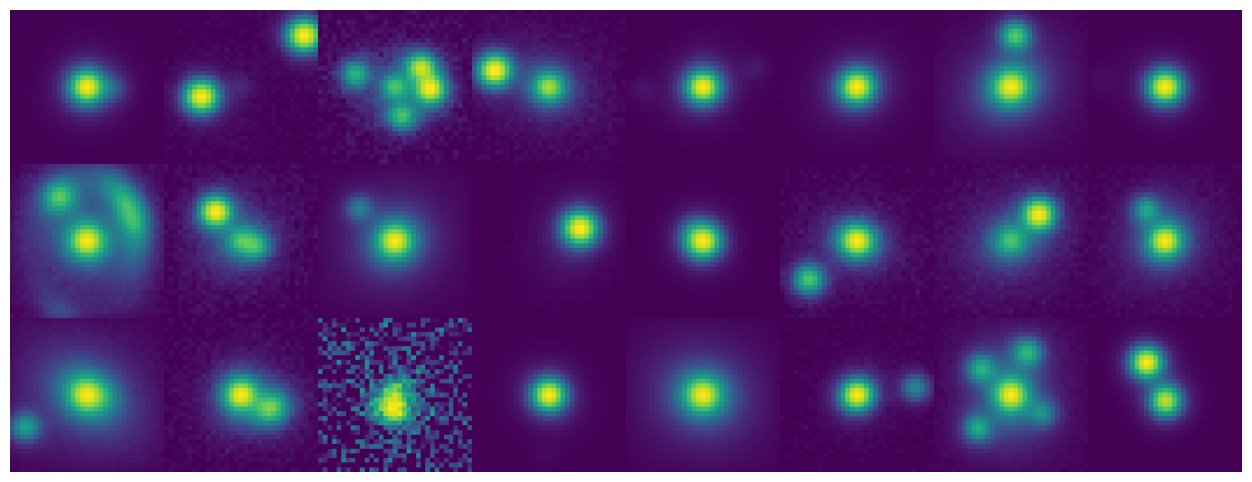

In [25]:
%matplotlib inline
visualization_utils.matrix_plot_from_npy(picked_files,names=picked_names,dim=(3,8),
                                         save_name='lsst.png',annotate=False)

In [53]:
# weights = sorted(os.listdir('train_results/model_weights'))
# losses = pd.read_csv('train_results/train.csv', index_col=0)
# file_list_bad= []
# num_files = len(weights)
# for i in range (num_files):
# # weights[0][-12:-8]
#     print(weights[i])
#     ind = int(weights[i][1:3])
#     ls = float(weights[i][-12:-8])
#     valloss = np.round(losses.loc[ind-1, 'val_loss'], 2)
#     # print(type(valloss), type(ls))
#     if not np.isclose(valloss,ls):
#         print(ind, 'latest loss: ', valloss, 'loss_on_file: ', ls)
#         file = f'train_results/model_weights/{weights[i]}'
#         file_list_bad.append(file)

In [15]:
# losses = pd.read_csv('train_results/train.csv', index_col=0)
# epochs = len(losses['val_loss'])
# losses

In [16]:
# losses = pd.read_csv('train_results/train.csv', index_col=0)
# epochs = losses.index
# plt.plot(epochs, losses['loss'], label='Training Loss')
# plt.plot(epochs, losses['val_loss'], label='Validation Loss')
# plt.legend()
# plt.title("Training Loss")

In [26]:
os.system(command = f'python ../paltas/Analysis/train_model.py lsst_train.py --tensorboard_dir train2_results')

/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


Checking for training data.
TFRecord found at generated_images/train2/config_LSST/data.tfrecord
Checking for validation data.
TFRecord found at generated_images/valid2/config_LSST/data.tfrecord
Checking for normalization csv
Writing input normalization to generated_images/train2/config_LSST/norms.csv
Initializing the model


/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Analysis/dataset_generation.py:300: UserWarning: No noise will be added
  warnings.warn('No noise will be added')
/Users/padmavenkatraman/Documents/StrongLensing/paltas/paltas/Analysis/dataset_generation.py:300: UserWarning: No noise will be added
  warnings.warn('No noise will be added')


Is model built: True
No weights found. Saving new weights to train_results/model_weights/_{epoch:02d}-{val_loss:.2f}.h5
Epoch 1/60
781/781 [==============================] - ETA: 0s - loss: 2.6295

/Users/padmavenkatraman/Documents/StrongLensing/silver/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


781/781 [==============================] - 1687s 2s/step - loss: 2.6295 - val_loss: 2.0928
Epoch 2/60
781/781 [==============================] - 1720s 2s/step - loss: 1.8287 - val_loss: 1.6884
Epoch 3/60
781/781 [==============================] - 1700s 2s/step - loss: 1.5678 - val_loss: 1.4435
Epoch 4/60
781/781 [==============================] - 1709s 2s/step - loss: 1.4427 - val_loss: 1.3970
Epoch 5/60
781/781 [==============================] - 1689s 2s/step - loss: 1.3119 - val_loss: 1.3291
Epoch 6/60
781/781 [==============================] - 1719s 2s/step - loss: 1.1775 - val_loss: 1.1008
Epoch 7/60
781/781 [==============================] - 1761s 2s/step - loss: 1.0462 - val_loss: 0.9569
Epoch 8/60
781/781 [==============================] - 1738s 2s/step - loss: 0.9385 - val_loss: 0.8792
Epoch 9/60
781/781 [==============================] - 1950s 2s/step - loss: 0.8526 - val_loss: 0.7698
Epoch 10/60
781/781 [==============================] - 1887s 2s/step - loss: 0.7705 - val_los

0